In [6]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from tyssue import Sheet, PlanarGeometry
from tyssue.draw import sheet_view

from scipy.integrate import solve_ivp
geom = PlanarGeometry

In [7]:
sigma_0()

ValueError: Scalar operands are not allowed, use '*' instead

In [3]:
np.identity(2)[::-1, :]

array([[0., 1.],
       [1., 0.]])

In [13]:
(recrutement + auto_catalytique) @ concs

NameError: name 'concs' is not defined

(0, 1.1)

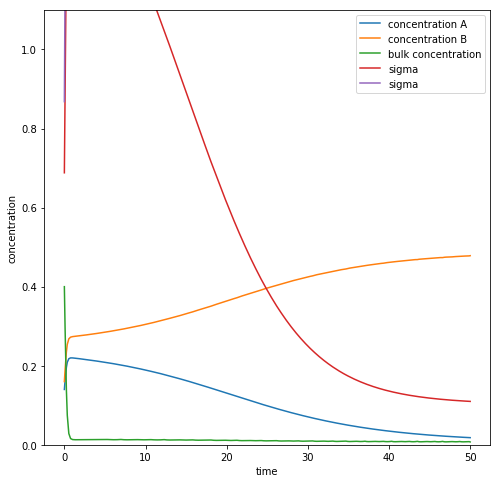

In [86]:
recrutement = 0.  # k
meca_sens = 1.  # k'

auto_catalytique = 0. # k"
relax_rate = 0.1 # 1 / τ 
N = 1.
c_0 = 0.1
length = 1.
susceptiblity=300.
desorption = relax_rate    
#Cas symétrique

length = 1. # \ell

def sigma_0():
    #return ((relax_rate * length**2 * c_0)/(N - 4 * length * c_0)
    #- (recrutement + auto_catalytique) * c_0) / susceptiblity 
    return 0.1

def c_bulk(concs):
    return (N - 2*(length*concs).sum()) / length**2

def tension(concs):
#    tension = sigma_0() * np.exp(susceptiblity * (concs - c_0))
    tension = sigma_0() * (1 + susceptiblity * concs ** 2)
    return tension



def ode(t, concs):
    c_B = c_bulk(concs)
    sigma = tension(concs)
    
    #concs_dot = (((recrutement + auto_catalytique) @ concs + sigma) * c_B - concs*relax_rate)
    concs_dot = - desorption * concs
    concs_dot += ((recrutement + auto_catalytique) * concs + meca_sens * sigma ) * c_B
    return concs_dot



concs_0 = np.array([0.14, 0.16])

res = solve_ivp(ode, (0, 50), concs_0, )

fig, ax = plt.subplots()
times = res['t']
conc = res['y'][0, :]

conc2 = res['y'][1, :]

c_B = np.array([c_bulk(c+c2) for c, c2 in zip(conc, conc2)])

sigma = np.array([tension(np.array((c,c2))) for c, c2 in zip(conc, conc2)])


ax.plot(times, conc, label="concentration A")
ax.plot(times, conc2, label="concentration B")


#ax.plot(times, np.ones_like(times)*N/length, label="max concentration")

ax.plot(times, c_B, label="bulk concentration")

ax.plot(times, sigma, label="sigma")
#ax.plot(times, 2*(conc + conc2) + c_B,label='conc_tot')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('concentration')
fig.set_size_inches((8, 8))
#ax.set_xlim(0, 4)
ax.set_ylim(0, 1.1)




In [52]:
sigma

array([[-5.33333333e-002, -5.60677918e-002],
       [-5.32639842e-002, -5.60082711e-002],
       [-5.25476202e-002, -5.55190921e-002],
       [-4.98578860e-002, -5.49124830e-002],
       [-4.66577718e-002, -5.50831003e-002],
       [-4.16085332e-002, -5.58965469e-002],
       [-3.51891854e-002, -5.73926053e-002],
       [-2.66733252e-002, -6.01197836e-002],
       [-1.73487819e-002, -6.46708686e-002],
       [-8.63105842e-003, -7.27188973e-002],
       [-2.82078553e-003, -8.73787272e-002],
       [-4.43941551e-004, -1.17181035e-001],
       [-2.33038109e-005, -1.82942905e-001],
       [-6.52328072e-007, -3.03472475e-001],
       [-4.52430801e-008, -4.31606359e-001],
       [-4.41131893e-010, -7.51206396e-001],
       [-1.70107027e-012, -1.31303445e+000],
       [-4.03427079e-015, -2.09360723e+000],
       [-3.57130337e-019, -3.32139081e+000],
       [-3.55380616e-023, -4.22451919e+000],
       [-2.83050830e-028, -4.88990072e+000],
       [-3.48894518e-036, -5.33279779e+000],
       [-1

In [45]:
for c, c2 in zip(conc, conc2):
    print(c_bulk(np.array((c,c2))))

0.3999999999999999
0.4094531576514756
0.4987051246665619
0.7528227017244395
1.0057623239729514
1.4052607046869117
1.969875131672291
2.892480303368381
4.3211596426477
6.644618501628676
10.383423168892174
16.605861509162537
26.61234925558054
38.89118034094699
48.15627965164212
64.4614581650806
84.46014063090122
106.77069919200991
142.25366011073913
178.152579971944
224.52946717126795
297.0288015144958
421.12076299765437
643.3537702219679
1033.8982940760618
1659.835558765544
2668.653908220779
4282.4068189019345
6874.906455072059
11028.942023685157
17695.50175362812
28384.148242450174
45531.26942022962
73029.85318049123
117138.07413349184
187879.5948358127
301344.6255438942
483327.2374475088
775210.8334291894
1243357.8729984893
1994218.3054616207
3198515.1108121034
5130080.589636326
8228101.749142884
13196997.741822999
21166570.986355435
33948913.88189781
54450418.44964302
87332634.82846841
140072173.91633818
224660716.6030759
360331680.66150147
577933468.2689173
926943592.9445944
14867167

In [80]:
concs = np.array((1,2))
concs
concs ** 2


array([1, 4])